# imports

In [2]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

In [3]:
import _pickle as pkl
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm, tqdm_notebook
from collections import defaultdict

# data import

In [ ]:
icd = pkl.load(open('/Users/shams/querent-datascience/Diagnosis_ICD/HierarchicalClassification/level_01_stage_01_df_icd.pkl', 'rb'))
feature_label_encoder = LabelEncoder()
class_label_encoder = LabelEncoder()
feature_label_encoder.fit([i for j in icd.umls_codes.tolist() for i in j])
class_label_encoder.fit([i for i in icd.target.tolist()])

icd_dict = defaultdict(set)

for i, row in tqdm_notebook(icd.iterrows(), total=len(icd)):
    if (len(row.umls_codes) == 0):
        continue
    icd_dict[row.target] = icd_dict[row.target].union(set(row.umls_codes))

X = []
y = []
y_label = []
for key, values in icd_dict.items():
    if len(key) == 0:
        continue
    X.append(feature_label_encoder.transform(list(values)))
    y.append(class_label_encoder.transform([key])[0])
    y_label.append(key)

X_backup = X
y_backup = y

X_np = np.zeros((len(X), len(feature_label_encoder.classes_)), dtype=np.int)
y = np.array(y, dtype=np.int)
for i in range(len(X)):
    X_np[i][X[i]] = 1
X = X_np

len(y_label)
n_neighbors = 10

In [12]:
icd = pkl.load(open('/Users/shams/querent-datascience/Diagnosis_ICD/HierarchicalClassification/level_01_stage_01_df_icd.pkl', 'rb'))
feature_label_encoder = LabelEncoder()
class_label_encoder = LabelEncoder()
feature_label_encoder.fit([i for j in icd.umls_codes.tolist() for i in j])
class_label_encoder.fit([i for i in icd.target.tolist()])
sample_icd = icd.sample(500)
X_raw = []
y_raw = []
for i, row in tqdm_notebook(sample_icd.iterrows(), total=len(sample_icd)):
    if (len(row.umls_codes) == 0):
        continue
    y_raw.append(class_label_encoder.transform([row.target])[0])
    X_raw.append(feature_label_encoder.transform(row.umls_codes))
assert len(X_raw) == len(y_raw)
X = np.zeros((len(X_raw), len(feature_label_encoder.classes_)), dtype=np.int0)
y = np.array(y_raw)
for i in range(len(X_raw)):
    X[i][X_raw[i]] = 1

In [35]:
icd = pkl.load(open('/Users/shams/querent-datascience/Diagnosis_ICD/HierarchicalClassification/level_01_stage_01_df_icd.pkl', 'rb'))
feature_label_encoder = LabelEncoder()
class_label_encoder = LabelEncoder()
icd['category'] = icd.icd_code.apply(lambda x: x[:3])
sample_icd = icd[icd.target=='A00-B99']
feature_label_encoder.fit([i for j in icd.umls_codes.tolist() for i in j])
class_label_encoder.fit([i for i in icd.category.tolist()])
X_raw = []
y_raw = []
for i, row in tqdm_notebook(sample_icd.iterrows(), total=len(sample_icd)):
    if (len(row.umls_codes) == 0):
        continue
    y_raw.append(class_label_encoder.transform([row.category])[0])
    X_raw.append(feature_label_encoder.transform(row.umls_codes))
assert len(X_raw) == len(y_raw)
X = np.zeros((len(X_raw), len(feature_label_encoder.classes_)), dtype=np.int0)
y = np.array(y_raw)
for i in range(len(X_raw)):
    X[i][X_raw[i]] = 1

In [ ]:
digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
y_label = y
n_samples, n_features = X.shape
n_neighbors = 

# Scale and visualize the embedding vectors

In [6]:
def plot_embedding(X, title=None, y_label=None):
    if y_label == None:
        y_label = y
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y_label[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
#             imagebox = offsetbox.AnnotationBbox(
#                 offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
#                 X[i])
#             ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

# Plot images

In [ ]:
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

plt.show()

# Random 2D projection using a random unitary matrix

Computing random projection


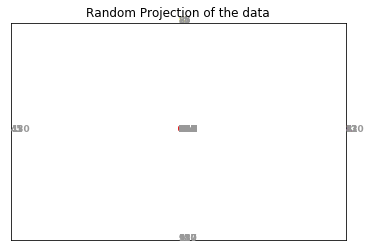

In [36]:
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)

plot_embedding(X_projected, "Random Projection of the data")

# Projection on to the first 2 principal components

Computing PCA projection


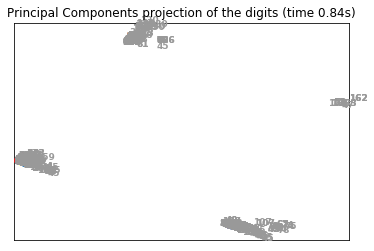

In [37]:
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

# Projection on to the first 2 linear discriminant components

In [ ]:
print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
plot_embedding(X_lda,
               "Linear Discriminant projection of the digits (time %.2fs)" %
               (time() - t0))

# Isomap projection of the digits dataset

Computing Isomap embedding
Done.


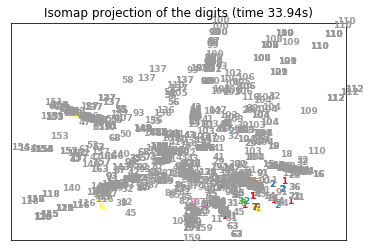

In [39]:
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(5, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))

# Locally linear embedding of the digits dataset

In [ ]:
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(5, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle,
               "Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))

# Modified Locally linear embedding of the digits dataset

Computing modified LLE embedding
Done. Reconstruction error: 0.000782359


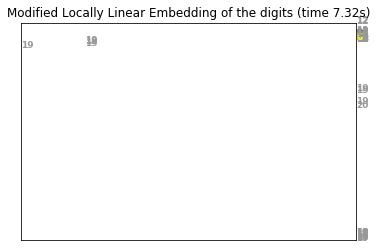

In [28]:
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(10, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_mlle,
               "Modified Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))

# HLLE embedding of the digits dataset

In [41]:
print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(10, n_components=2,
                                      method='hessian')
t0 = time()
X_hlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_hlle,
               "Hessian Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))

Computing Hessian LLE embedding


ValueError: Error in determining null-space with ARPACK. Error message: 'Factor is exactly singular'. Note that method='arpack' can fail when the weight matrix is singular or otherwise ill-behaved.  method='dense' is recommended. See online documentation for more information.

# LTSA embedding of the digits dataset

In [ ]:
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(5, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_ltsa,
               "Local Tangent Space Alignment of the digits (time %.2fs)" %
               (time() - t0))

# MDS  embedding of the digits dataset

Computing MDS embedding
Done. Stress: 95702.347019


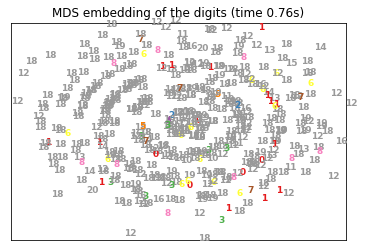

In [31]:
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))

# Random Trees embedding of the digits dataset

Computing Totally Random Trees embedding


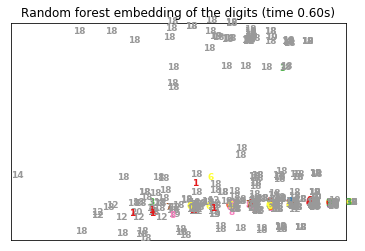

In [32]:
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced,
               "Random forest embedding of the digits (time %.2fs)" %
               (time() - t0))

# Spectral embedding of the digits dataset

Computing Spectral embedding


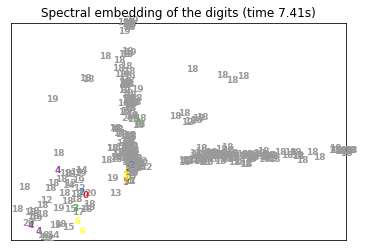

In [33]:
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se,
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))

# t-SNE embedding of the digits dataset

In [ ]:
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = X
X_tsne = np.nan_to_num(X_tsne)
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))